In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

2023-11-26 20:10:49.891946: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 20:10:49.893900: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 20:10:49.925253: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 20:10:49.925298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 20:10:49.925318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Hàm để tạo tập dữ liệu từ thư mục hình ảnh
def create_dataset(img_folder):
    img_data = []
    labels = []
    for filename in os.listdir(img_folder):
        if filename.endswith(".png"):
            img = Image.open(os.path.join(img_folder, filename))
            img_array = np.array(img)
            img_data.append(img_array)
            label = int(filename[3])
            labels.append(label)
    return img_data, labels

In [3]:
#Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
#b1. Đọc ảnh từ file đã lưu, dùng open cv
#img=cv2.imread('img1.jpg')

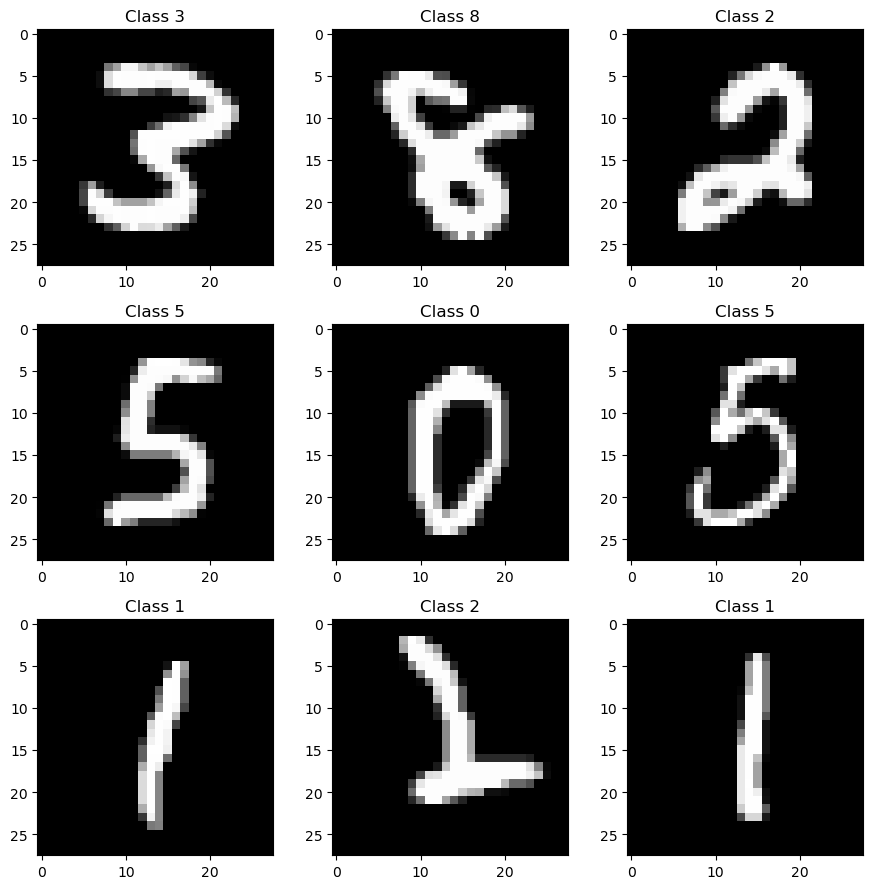

In [4]:
# Visualize some random images from the dataset
plt.rcParams['figure.figsize'] = (9, 9)
for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [5]:
# Reshape and preprocess the data
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# One-hot encode the labels
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
#Đọc hình ảnh và nhãn từ thư mục 'imgs'
img_data, labels = create_dataset('imgs')

# Chuyển đổi danh sách hình ảnh và nhãn thành mảng numpy
img_data = np.array(img_data)
labels = np.array(labels)

# Reshape hình ảnh để phù hợp với định dạng của tập dữ liệu MNIST
img_data = img_data.reshape(len(img_data), 784)

# Chia tỷ lệ hình ảnh để giá trị pixel nằm trong khoảng từ 0 đến 1
img_data = img_data.astype('float32') / 255

# One-hot encode nhãn
labels = np_utils.to_categorical(labels, nb_classes)

In [8]:
# Kết hợp tập dữ liệu mới với tập dữ liệu MNIST
X_train = np.concatenate((X_train, img_data))
Y_train = np.concatenate((Y_train, labels))

In [9]:
# Build and train the Dense model
model_dense = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

# Save the Dense model
model_dense.save('dense_model.h5')

2023-11-26 20:10:53.497425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-26 20:10:53.525846: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
477/477 [==============================] - 4s 7ms/step - loss: 0.2759 - accuracy: 0.9166
Epoch 2/10
477/477 [==============================] - 3s 7ms/step - loss: 0.1230 - accuracy: 0.9621
Epoch 3/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0874 - accuracy: 0.9723
Epoch 4/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0656 - accuracy: 0.9787
Epoch 5/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0540 - accuracy: 0.9821
Epoch 6/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0439 - accuracy: 0.9866
Epoch 7/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0367 - accuracy: 0.9883
Epoch 8/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0333 - accuracy: 0.9890
Epoch 9/10
477/477 [==============================] - 3s 7ms/step - loss: 0.0328 - accuracy: 0.9888
Epoch 10/10
477/477 [==============================] - 4s 7ms/step - loss: 0.0265 - accuracy: 0.9912